In [1]:
from keras import applications, optimizers
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.convolutional import Convolution2D
from keras import backend as K
import keras
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from img_loader import DatasetLoader
from keras.utils import np_utils
from keras.preprocessing import image
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
from sklearn.preprocessing import MinMaxScaler
import scipy.misc
from PIL import ImageEnhance
import cv2
import matplotlib.pyplot as pp
from keras.models import load_model, save_model

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
dl = DatasetLoader("/home/lux/dev/Bachelor-2017/keras/dataset", 400)
model = Sequential(applications.VGG16(weights='imagenet', include_top=False).layers)

# last conv for having only one inbound node
model.add(Convolution2D(512, 3, 3, activation='relu', border_mode="same", name="CAM"))
model.add(GlobalAveragePooling2D(name="GAP"))
model.add(Dense(dl.nb_classes, activation='softmax', name='W'))

model.load_weights('/home/lux/dev/Bachelor-2017/notebook_CAM/vgg_ft_gap_cam_normal.h5')

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

DATASET LOADER] Discovering dataset...
DATASET LOADER] 
38 classes found.
 54305 images found.
DATASET LOADER] Shuffling order...
DATASET LOADER] 
Ready for loading!
 40728 for training and 13576 for testing
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), name="CAM", activation="relu", padding="same")`


In [4]:
i = 201

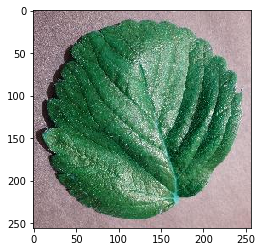

('Tomato___Target_Spot', 0)
('Pepper,_bell___Bacterial_spot', 1)
('Corn_(maize)___Northern_Leaf_Blight', 2)
('Strawberry___healthy', 3)
('Cherry_(including_sour)___Powdery_mildew', 4)
('Corn_(maize)___healthy', 5)
('Tomato___healthy', 6)
('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 7)
('Cherry_(including_sour)___healthy', 8)
('Peach___Bacterial_spot', 9)
('Blueberry___healthy', 10)
('Grape___Esca_(Black_Measles)', 11)
('Peach___healthy', 12)
('Tomato___Spider_mites Two-spotted_spider_mite', 13)
('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 14)
('Tomato___Bacterial_spot', 15)
('Tomato___Early_blight', 16)
('Potato___healthy', 17)
('Pepper,_bell___healthy', 18)
('Squash___Powdery_mildew', 19)
('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 20)
('Tomato___Leaf_Mold', 21)
('Apple___Black_rot', 22)
('Tomato___Tomato_mosaic_virus', 23)
('Apple___healthy', 24)
('Potato___Early_blight', 25)
('Strawberry___Leaf_scorch', 26)
('Soybean___healthy', 27)
('Grape___healthy', 28)
('Tomato___Sept

In [5]:
predict_input = cv2.imread(dl.baseDirectory + "/" + dl.imgDataArray[i].directory + "/" +
                                       dl.imgDataArray[i].name, cv2.IMREAD_COLOR)
plt.imshow(predict_input,cmap='gray')
plt.show()
predict_input = np.expand_dims(predict_input, axis=0)
for d in dl.directories:
    print(d)

In [6]:
predict_input.shape

(1, 256, 256, 3)

In [7]:
predict_input = predict_input.astype('float32')
predict_input = preprocess_input(predict_input)

In [8]:
predictions = model.predict(predict_input)
model.predict_classes(predict_input)

1/1 [==============================] - 1s


array([21])

In [9]:
predictions[0]

array([  1.24988995e-12,   4.24587102e-11,   8.41744534e-13,
         1.07901384e-14,   1.47597212e-09,   6.82081769e-09,
         1.63966323e-11,   1.43868598e-12,   1.65726027e-12,
         2.94036667e-15,   1.18290613e-10,   2.01941740e-12,
         8.05205359e-15,   1.50831021e-13,   6.22212731e-13,
         5.02790531e-10,   4.80053887e-12,   3.59272101e-13,
         1.47722112e-11,   1.48761573e-10,   1.00644624e-14,
         9.99993443e-01,   6.02080081e-06,   1.91162988e-11,
         5.49414665e-07,   2.02691120e-16,   8.54488531e-16,
         3.42894475e-20,   7.00752845e-10,   2.03919585e-12,
         6.11610251e-16,   1.23155717e-12,   2.82275353e-12,
         1.05774711e-09,   1.53401603e-09,   1.41396938e-14,
         1.06152136e-11,   4.43292443e-17], dtype=float32)

(38,)


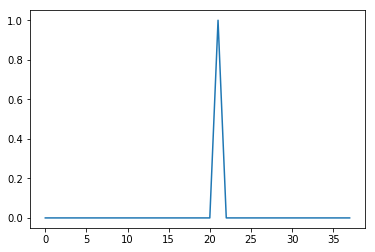

In [10]:
print(predictions[0].shape)
pp.plot(predictions[0])
pp.show()

In [11]:
# predicted class value
value = np.amax(predictions[0])
value

0.99999344

In [12]:
# predicted class is 
print("predicted shample name = ", dl.imgDataArray[i].name)
print("predicted shample's class = ", dl.imgDataArray[i].img_class)
print("predicted shample's directory = ", dl.imgDataArray[i].directory)
np.where(predictions[0]==value)

predicted shample name =  d564ec62-6533-4d66-98d6-f60f097d8f6c___RS_HL 4824.JPG
predicted shample's class =  3
predicted shample's directory =  Strawberry___healthy


(array([21]),)

In [13]:
redo, x_test, y_test = dl.load_dataset()
# Preprocessing
x_test = x_test.astype('float32')
x_test = preprocess_input(x_test)

y_test_2 = np_utils.to_categorical(y_test, dl.nb_classes)

DATASET LOADER] 
Max img loaded! 399 / 54305
DATASET LOADER] Loading completed!
